In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,pd,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.2.0
numpy 1.18.1
sklearn 0.22.2.post1
pandas 1.0.1
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


# 1. 加载数据 #

In [36]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_all,Y_train_all),(X_test,Y_test) = fashion_mnist.load_data()

In [37]:
X_train,Y_train = X_train_all[5000:],Y_train_all[5000:]
X_valid,Y_valid = X_train_all[:5000],Y_train_all[:5000]
print("train set:",X_train.shape,Y_train.shape)
print('valid set:',X_valid.shape,Y_valid.shape)
print('test set:',X_test.shape,Y_test.shape)

train set: (55000, 28, 28) (55000,)
valid set: (5000, 28, 28) (5000,)
test set: (10000, 28, 28) (10000,)


# 2. 显示数据 #

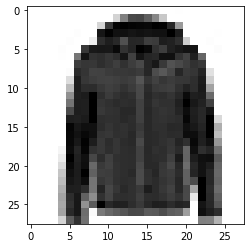

In [38]:
def show_single_image(arr):
    plt.imshow(arr,cmap='binary')
    plt.show();
    
show_single_image(X_train[0])

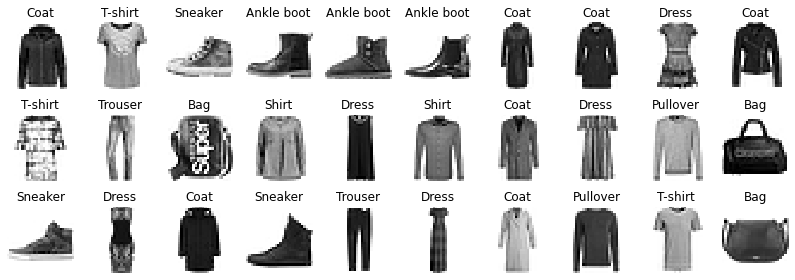

In [39]:
def show_images(n_rows,n_cols,x_data,y_data,classes):
    assert len(x_data) == len(y_data)
    assert n_cols * n_rows <= len(x_data)

    fig = plt.figure(figsize=(n_cols * 1.4,n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            i = row * n_cols + col
            ax = fig.add_subplot(n_rows,n_cols,i+1,title=classes[y_data[i]])
            ax.imshow(x_data[i],cmap='binary',interpolation='nearest')
            ax.axis('off')
    plt.show()    

class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

show_images(3,10,X_train,Y_train,class_names)

In [40]:
# 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train.astype('float32').reshape(-1,1)).reshape(-1,28,28)
X_valid_scaler = scaler.transform(X_valid.astype('float32').reshape(-1,1)).reshape(-1,28,28)
X_test_scaler = scaler.transform(X_test.astype('float32').reshape(-1,1)).reshape(-1,28,28)

In [50]:
# 因为是色值，直接除以255做归一化，没有标准归一化高
X_train_scaler = X_train / 255
X_valid_scaler = X_valid / 255
X_test_scaler = X_test / 255

# 3. 定义模型 #

## 3.1 定义模型 ##

In [55]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu')) #归一化之后，可以用relu了，而且准确度比sigmoid高
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

## 3.2 编译模型 ##

In [56]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

## 3.3 训练模型 ##

In [57]:
history = model.fit(X_train_scaler,Y_train,epochs=10,validation_data=(X_valid_scaler,Y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.5270 - accuracy: 0.8160 - val_loss: 0.3896 - val_accuracy: 0.8650
Epoch 2/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3922 - accuracy: 0.8598 - val_loss: 0.3837 - val_accuracy: 0.8566
Epoch 3/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3540 - accuracy: 0.8729 - val_loss: 0.3757 - val_accuracy: 0.8652
Epoch 4/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3292 - accuracy: 0.8806 - val_loss: 0.3258 - val_accuracy: 0.8868
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3092 - accuracy: 0.8885 - val_loss: 0.3317 - val_accuracy: 0.8822
Epoch 6/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2936 - accuracy: 0.8929 - val_loss: 0.3174 - val_accuracy: 0.8820
Epoch 7/10
55000/55000 [============================

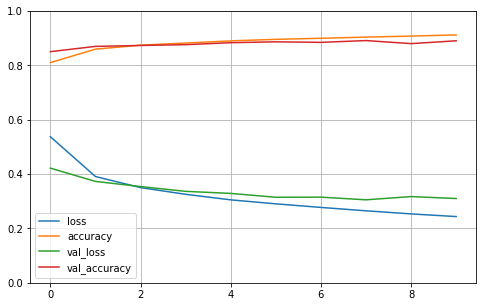

In [49]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history) # 标准归一化

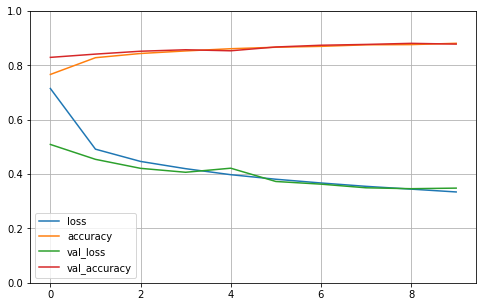

In [54]:
plot_learning_curves(history) # 除以255归一化的图

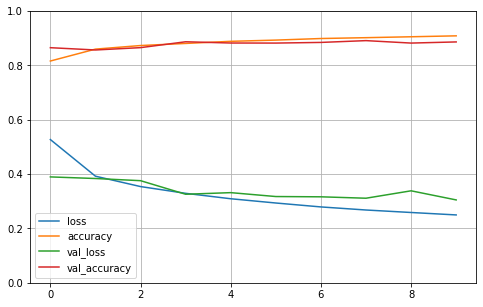

In [58]:
plot_learning_curves(history) # 批归一化